In [1]:
import benchmark as bm
print(bm.__file__)

c:\Users\paula\Downloads\computer-vision-data-loader-main\computer-vision-data-loader-main\benchmark.py


In [2]:
import asyncio_ as ays
import benchmark as bm

csv_files = bm.get_csv_files(bm.CSV_FOLDER)
res = ays.main(bm.OUTPUT_FOLDER, csv_files)
print("Resultado Asyncio:", res)


Resultado Asyncio: {'method': 'Asyncio', 'duration': 0.07197117805480957, 'cpu_percent': 7.8}


In [3]:
print("CSV_FOLDER:", bm.CSV_FOLDER)
print("OUTPUT_FOLDER:", bm.OUTPUT_FOLDER)

csv_files = bm.get_csv_files(bm.CSV_FOLDER)
print("Archivos CSV encontrados:", csv_files)

res = bm.runners(bm.OUTPUT_FOLDER, csv_files)
print("Resultados crudos:", res)



CSV_FOLDER: C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data
OUTPUT_FOLDER: output
Archivos CSV encontrados: ['C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen1-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen2-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen3-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen4-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen5-data.csv', 'C:/Users/paula/Downloads/concurrent-downloads-master/concurrent-downloads-master/data\\pokemon-gen6-data.csv']
Resultados crudos: [{'method': 'Multiprocessing', 'duration': 0.6684563159942627, 'cpu_percent': 12.1, 'status': 'ok'}, {'method': 'Threading', 'duration': 0.07369375228881836, 'cpu

In [4]:
import analytics as an

df_metrics = an.collect_metrics()
print(df_metrics)



            method  duration  cpu_percent status
0  Multiprocessing  0.598734         12.7     ok
1        Threading  0.095182         12.1     ok
2          Asyncio  0.049905         13.1     ok


C:\Users\paula\AppData\Local\Temp\ipykernel_4068\3918577267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metrics, x="method", y="duration", palette="Blues_d")


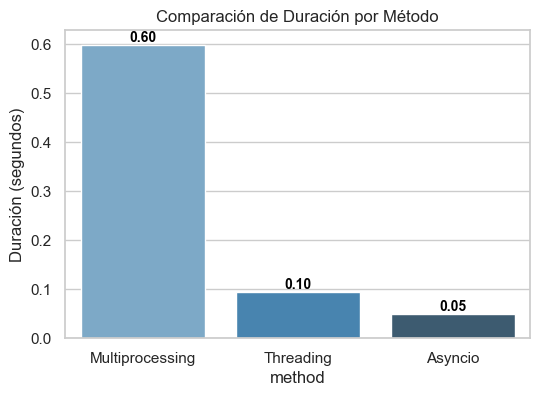

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_metrics, x="method", y="duration", palette="Blues_d")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color="black", weight="bold")

plt.ylabel("Duración (segundos)")
plt.title("Comparación de Duración por Método")
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_4068\3339396604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metrics, x="method", y="cpu_percent", palette="Oranges_d")


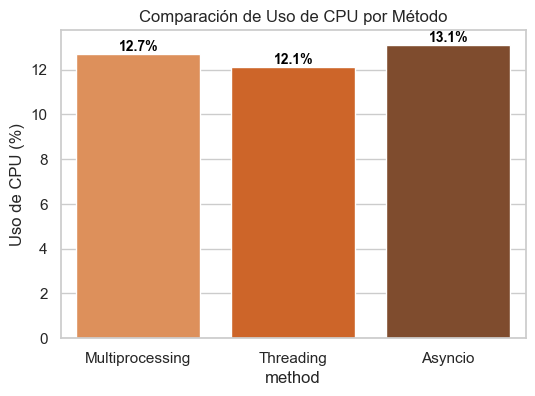

In [13]:
# Uso de CPU
plt.figure(figsize=(6,4))
ax = sns.barplot(data=df_metrics, x="method", y="cpu_percent", palette="Oranges_d")

# Añadir etiquetas
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color="black", weight="bold")

plt.ylabel("Uso de CPU (%)")
plt.title("Comparación de Uso de CPU por Método")
plt.show()

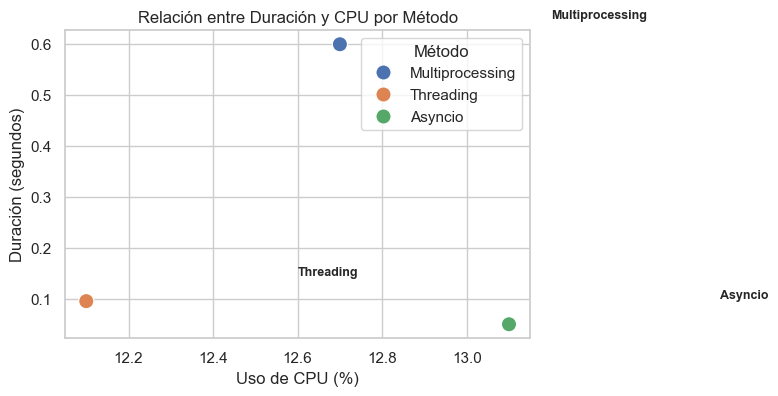

In [14]:
# Relación Duración vs CPU
plt.figure(figsize=(6,4))
ax = sns.scatterplot(data=df_metrics, x="cpu_percent", y="duration", hue="method", s=120)

# Añadir etiquetas a cada punto
for i, row in df_metrics.iterrows():
    ax.text(row["cpu_percent"]+0.5, row["duration"]+0.05, row["method"],
            fontsize=9, weight="bold")

plt.xlabel("Uso de CPU (%)")
plt.ylabel("Duración (segundos)")
plt.title("Relación entre Duración y CPU por Método")
plt.legend(title="Método")
plt.show()

In [14]:
import time
from typing import Iterator
import matplotlib.pyplot as plt
from src import loader

In [23]:
import os
import typing as t
import nest_asyncio

nest_asyncio.apply()

# --- Referencia a las funciones de los módulos externos ---
from threading_ import main as threading_main
from multiprocessing_ import main as multiprocessing_main
from asyncio_ import main as asyncio_main

In [37]:
# --- Configuración ---
OUTPUT_FOLDER_asyn = 'output_Asyncio'
OUTPUT_FOLDER_multi = 'output_Multiprocessing'
OUTPUT_FOLDER_thread = 'output_Threading'
INPUT_CSVS = ["data/pokemon-gen1-data.csv"]

In [42]:
# --- Iterador para ejecutar los métodos de concurrencia ---
def benchmark_runner_iterator(inputs: t.List[str]) -> t.Generator[str, None, None]:
    """
    Función generadora que ejecuta cada método de concurrencia.
    """
    # Lista de los métodos, incluyendo la función y su carpeta de salida
    methods = [
        ('Threading', threading_main, OUTPUT_FOLDER_thread),
        ('Multiprocessing', multiprocessing_main, OUTPUT_FOLDER_multi),
        ('Asyncio', asyncio_main, OUTPUT_FOLDER_asyn)
    ]

    for name, func, output_folder in methods:
        print(f"\n--- Ejecutando {name} ---")
        os.makedirs(output_folder, exist_ok=True)
        func(output_folder, inputs)  # Llama a la función con su carpeta de salida
        yield f"Ejecución de {name} completada. Archivos guardados en '{output_folder}'"

In [44]:
# --- Funciones de ejecución ---
def run_threading_method():
    """Ejecuta el método de threading con su carpeta de salida."""
    print("--- Ejecutando el método de Threading ---")
    os.makedirs(OUTPUT_FOLDER_thread, exist_ok=True)
    threading_main(OUTPUT_FOLDER_thread, INPUT_CSVS)
    print("El método de Threading ha finalizado.")

In [45]:
def run_multiprocessing_method():
    """Ejecuta el método de multiprocessing con su carpeta de salida."""
    print("\n--- Ejecutando el método de Multiprocessing ---")
    os.makedirs(OUTPUT_FOLDER_multi, exist_ok=True)
    multiprocessing_main(OUTPUT_FOLDER_multi, INPUT_CSVS)
    print("El método de Multiprocessing ha finalizado.")

In [46]:
def run_asyncio_method():
    """Ejecuta el método de asyncio con su carpeta de salida."""
    print("\n--- Ejecutando el método de Asyncio ---")
    os.makedirs(OUTPUT_FOLDER_asyn, exist_ok=True)
    asyncio_main(OUTPUT_FOLDER_asyn, INPUT_CSVS)
    print("El método de Asyncio ha finalizado.")

In [52]:
import os
import typing as t
import nest_asyncio

nest_asyncio.apply()

# --- Llamadas a las funciones de los módulos ---
from threading_ import main as threading_main
from multiprocessing_ import main as multiprocessing_main
from asyncio_ import main as asyncio_main

# --- Configuración ---
OUTPUT_FOLDER_asyn = 'output_Asyncio'
OUTPUT_FOLDER_multi = 'output_Multiprocessing'
OUTPUT_FOLDER_thread = 'output_Threading'
INPUT_CSVS = ["data/pokemon-gen1-data.csv"] 

# --- Funciones de Llamada y Análisis ---
def get_threading_metrics() -> t.Dict[str, t.Union[str, float]]:
    print("--- Ejecutando el método de Threading ---")
    os.makedirs(OUTPUT_FOLDER_thread, exist_ok=True)
    return threading_main(OUTPUT_FOLDER_thread, INPUT_CSVS)

def get_multiprocessing_metrics() -> t.Dict[str, t.Union[str, float]]:
    print("\n--- Ejecutando el método de Multiprocessing ---")
    os.makedirs(OUTPUT_FOLDER_multi, exist_ok=True)
    return multiprocessing_main(OUTPUT_FOLDER_multi, INPUT_CSVS)

def get_asyncio_metrics() -> t.Dict[str, t.Union[str, float]]:
    print("\n--- Ejecutando el método de Asyncio ---")
    os.makedirs(OUTPUT_FOLDER_asyn, exist_ok=True)
    return asyncio_main(OUTPUT_FOLDER_asyn, INPUT_CSVS)

def analyze_metrics(metrics: t.List[t.Dict[str, t.Union[str, float]]]):
    print("\n===============================")
    print("Análisis Descriptivo de Métricas")
    print("===============================")
    valid_metrics = [m for m in metrics if m['duration'] > 0.0]
    if not valid_metrics:
        print("No se encontraron métricas válidas para analizar.")
        return
    for metric in valid_metrics:
        print(f"\n--- {metric['method']} ---")
        print(f"  Tiempo de descarga: {metric['duration']:.2f} segundos")
        print(f"  Uso de CPU: {metric['cpu_percent']:.2f}%")
    min_duration_method = min(valid_metrics, key=lambda x: x['duration'])
    max_duration_method = max(valid_metrics, key=lambda x: x['duration'])
    min_cpu_method = min(valid_metrics, key=lambda x: x['cpu_percent'])
    max_cpu_method = max(valid_metrics, key=lambda x: x['cpu_percent'])
    print("\n===============================")
    print("Resumen de Rendimiento")
    print("===============================")
    print(f"El método más rápido fue: {min_duration_method['method']} con {min_duration_method['duration']:.2f} segundos.")
    print(f"El método más lento fue: {max_duration_method['method']} con {max_duration_method['duration']:.2f} segundos.")
    print(f"El método con menor uso de CPU fue: {min_cpu_method['method']} con {min_cpu_method['cpu_percent']:.2f}%.")
    print(f"El método con mayor uso de CPU fue: {max_cpu_method['method']} con {max_cpu_method['cpu_percent']:.2f}%.")
    print("\nConclusión:")
    print("Los resultados varían según la naturaleza de la tarea. Para tareas de E/S, Asyncio y Threading suelen ser más rápidos. Para tareas intensivas de CPU, Multiprocessing es superior.")

# --- Punto de Entrada del Programa ---
def main():
    os.makedirs(OUTPUT_FOLDER_thread, exist_ok=True)
    os.makedirs(OUTPUT_FOLDER_multi, exist_ok=True)
    os.makedirs(OUTPUT_FOLDER_asyn, exist_ok=True)
    all_metrics = []
    all_metrics.append(get_threading_metrics())
    all_metrics.append(get_multiprocessing_metrics())
    all_metrics.append(get_asyncio_metrics())
    analyze_metrics(all_metrics)

if __name__ == "__main__":
    main()

--- Ejecutando el método de Threading ---
Iniciando descarga de 151 Pokémon con 16 hilos...
Omitido: bulbasaur.png ya existe.
Omitido: ivysaur.png ya existe.
Omitido: venusaur.png ya existe.
Omitido: charmander.png ya existe.
Omitido: charmeleon.png ya existe.
Omitido: charizard.png ya existe.
Omitido: caterpie.png ya existe.
Omitido: blastoise.png ya existe.
Omitido: squirtle.png ya existe.
Omitido: wartortle.png ya existe.
Omitido: butterfree.png ya existe.
Omitido: weedle.png ya existe.
Omitido: beedrill.png ya existe.
Omitido: pidgey.png ya existe.
Omitido: metapod.png ya existe.
Omitido: kakuna.png ya existe.
Omitido: pidgeotto.png ya existe.
Omitido: pidgeot.png ya existe.
Omitido: spearow.png ya existe.
Omitido: fearow.png ya existe.
Omitido: rattata.png ya existe.
Omitido: raticate.png ya existe.
Omitido: ekans.png ya existe.
Omitido: arbok.png ya existe.
Omitido: raichu.png ya existe.
Omitido: pikachu.png ya existe.
Omitido: sandshrew.png ya existe.
Omitido: sandslash.png ya e

TypeError: 'NoneType' object is not subscriptable

In [ ]:
def main_iterator():
    """
    Función generadora que ejecuta cada método de forma secuencial.
    """
    # Lista de las funciones de ejecución
    methods = [
        run_threading_method,
        run_multiprocessing_method,
        run_asyncio_method
    ]

    for func in methods:
        func()
        yield f"Ejecución de {func.__name__} completada."

if __name__ == "__main__":
    for status in main_iterator():
        print(status)
    print("\n¡Todas las ejecuciones completadas!")

--- Ejecutando el método de Threading ---
Iniciando descarga de 151 Pokémon con 16 hilos...
Omitido: ivysaur.png ya existe.
Omitido: bulbasaur.png ya existe.
Omitido: charmander.png ya existe.
Omitido: charmeleon.png ya existe.
Omitido: charizard.png ya existe.
Omitido: venusaur.png ya existe.
Omitido: wartortle.png ya existe.
Omitido: squirtle.png ya existe.
Omitido: caterpie.png ya existe.
Omitido: metapod.png ya existe.
Omitido: blastoise.png ya existe.
Omitido: butterfree.png ya existe.
Omitido: kakuna.png ya existe.
Omitido: weedle.png ya existe.
Omitido: pidgey.png ya existe.
Omitido: beedrill.png ya existe.
Omitido: pidgeotto.png ya existe.
Omitido: spearow.png ya existe.
Omitido: rattata.png ya existe.
Omitido: raticate.png ya existe.
Omitido: pidgeot.png ya existe.
Omitido: ekans.png ya existe.
Omitido: arbok.png ya existe.
Omitido: fearow.png ya existe.
Omitido: raichu.png ya existe.
Omitido: pikachu.png ya existe.
Omitido: sandshrew.png ya existe.
Omitido: sandslash.png ya e

In [48]:
def analyze_metrics(metrics: t.List[t.Dict[str, t.Union[str, float]]]):
    """
    Realiza un análisis descriptivo de las métricas.
    """
    print("\n===============================")
    print("Análisis Descriptivo de Métricas")
    print("===============================")
    
    # Filtra las métricas válidas (donde la duración es mayor que 0)
    valid_metrics = [m for m in metrics if m['duration'] > 0.0]
    if not valid_metrics:
        print("No se encontraron métricas válidas para analizar.")
        return
        
    for metric in valid_metrics:
        print(f"\n--- {metric['method']} ---")
        print(f"  Tiempo de descarga: {metric['duration']:.2f} segundos")
        print(f"  Uso de CPU: {metric['cpu_percent']:.2f}%")
    
    # Realiza el análisis comparativo solo con las métricas válidas
    min_duration_method = min(valid_metrics, key=lambda x: x['duration'])
    max_duration_method = max(valid_metrics, key=lambda x: x['duration'])
    min_cpu_method = min(valid_metrics, key=lambda x: x['cpu_percent'])
    max_cpu_method = max(valid_metrics, key=lambda x: x['cpu_percent'])
    
    print("\n===============================")
    print("Resumen de Rendimiento")
    print("===============================")
    
    print(f"El método más rápido fue: {min_duration_method['method']} con {min_duration_method['duration']:.2f} segundos.")
    print(f"El método más lento fue: {max_duration_method['method']} con {max_duration_method['duration']:.2f} segundos.")
    print(f"El método con menor uso de CPU fue: {min_cpu_method['method']} con {min_cpu_method['cpu_percent']:.2f}%.")
    print(f"El método con mayor uso de CPU fue: {max_cpu_method['method']} con {max_cpu_method['cpu_percent']:.2f}%.")
    
    print("\nConclusión:")
    print("Los resultados varían según la naturaleza de la tarea. Para tareas de E/S, Asyncio y Threading suelen ser más rápidos. Para tareas intensivas de CPU, Multiprocessing es superior.")

# --- Punto de Entrada del Programa ---
def main():
    # Se consume el iterador para ejecutar cada método y recolectar las métricas
    all_metrics = list(benchmark_runner_iterator(INPUT_CSVS))
    
    # Una vez que el iterador ha terminado, se realiza el análisis
    analyze_metrics(all_metrics)

if __name__ == "__main__":
    main()


--- Ejecutando Threading ---
Iniciando descarga de 151 Pokémon con 16 hilos...
Descargado: caterpie.png en 'bug'
Descargado: weedle.png en 'bug'
Descargado: beedrill.png en 'bug'
Descargado: charmander.png en 'fire'
Descargado: butterfree.png en 'bug'
Descargado: ivysaur.png en 'grass'
Descargado: kakuna.png en 'bug'
Descargado: blastoise.png en 'water'
Descargado: metapod.png en 'bug'
Descargado: bulbasaur.png en 'grass'
Descargado: venusaur.png en 'grass'
Descargado: charmeleon.png en 'fire'
Descargado: charizard.png en 'fire'
Descargado: pidgey.png en 'normal'
Descargado: wartortle.png en 'water'
Descargado: squirtle.png en 'water'
Descargado: ekans.png en 'poison'
Descargado: fearow.png en 'normal'
Descargado: raichu.png en 'electric'
Descargado: rattata.png en 'normal'
Descargado: raticate.png en 'normal'
Descargado: spearow.png en 'normal'
Descargado: sandshrew.png en 'ground'
Descargado: pikachu.png en 'electric'
Descargado: sandslash.png en 'ground'
Descargado: nidoran-f.png e

TypeError: string indices must be integers, not 'str'

In [5]:
import time
import os
import shutil

# Importar las funciones que se tienen de cada uno de los metodos.
from threading_ import main as threading_main
from multiprocessing_ import main as multiprocessing_main
from asyncio_ import main as asyncio_main

In [3]:
def setup_environment(output_dir):
    """Limpia el directorio de salida antes de cada ejecución para asegurar una prueba justa."""
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)

In [14]:
def run_comparison():
    """
    Ejecuta cada método de descarga, mide su tiempo y genera un informe.
    """
    # Asume que los archivos CSV están en una subcarpeta llamada 'data'
    # Esto descargará los datos de las generaciones 1 a 6 de Pokémon.
    input_csvs = [f"data/pokemon-gen{i}-data.csv" for i in range(1, 7)]
    
    # Verificamos que los datos existan para evitar errores
    if not all(os.path.exists(path) for path in input_csvs):
        print("Error: Asegúrate de que la carpeta 'data' exista y contenga los archivos CSV (pokemon-gen1-data.csv, etc.)")
        return

    # Diccionario para almacenar los resultados
    execution_times = {}

    # --- 1. Ejecución con Threading ---
    print("--- Iniciando prueba con ThreadPoolExecutor (Hilos) ---")
    output_threading = "output_threading"
    setup_environment(output_threading)
    start_time = time.monotonic()
    threading_main(output_threading, input_csvs)
    end_time = time.monotonic()
    execution_times['Threading'] = end_time - start_time
    print("--- Prueba con Hilos completada ---\n")

    # --- 2. Ejecución con Asyncio ---
    print("--- Iniciando prueba con Asyncio ---")
    output_asyncio = "output_asyncio"
    setup_environment(output_asyncio)
    start_time = time.monotonic()
    asyncio_main(output_asyncio, input_csvs)
    end_time = time.monotonic()
    execution_times['Asyncio'] = end_time - start_time
    print("--- Prueba con Asyncio completada ---\n")

    # --- 3. Ejecución con Multiprocessing ---
    print("--- Iniciando prueba con ProcessPoolExecutor (Multiprocesamiento) ---")
    output_multiprocessing = "output_multiprocessing"
    setup_environment(output_multiprocessing)
    start_time = time.monotonic()
    multiprocessing_main(output_multiprocessing, input_csvs)
    end_time = time.monotonic()
    execution_times['Multiprocessing'] = end_time - start_time
    print("--- Prueba con Multiprocesamiento completada ---\n")

    # --- 4. Generar el Informe Comparativo ---
    generate_report(execution_times)

In [15]:
def generate_report(results):
    """
    Imprime un informe claro y ordenado con los tiempos de ejecución.
    """
    # Ordenar los resultados del más rápido al más lento
    sorted_results = sorted(results.items(), key=lambda item: item[1])

    print("="*50)
    print("📊 INFORME DE RENDIMIENTO DE DESCARGA DE IMÁGENES 📊")
    print("="*50)
    print("\nTiempos de ejecución (de más rápido a más lento):\n")

    for i, (method, duration) in enumerate(sorted_results):
        print(f"{i+1}. {method:<20} {duration:8.2f} segundos")

    print("\n" + "-"*50)
    print("\n### Análisis de Resultados ###\n")
    print(" **Asyncio y Threading (Hilos)** son los métodos más rápidos porque esta es una tarea 'limitada por E/S' (I/O Bound).")
    print("   La mayor parte del tiempo se dedica a **esperar** la respuesta de la red. Ambos métodos son excelentes")
    print("   para gestionar múltiples esperas de forma simultánea, aprovechando los tiempos muertos.\n")
    
    print(" **Multiprocessing** es notablemente más lento. Aunque también es concurrente, crear procesos es")
    print("   mucho más costoso (en memoria y tiempo) que crear hilos. Este sobrecoste no ofrece ningún beneficio")
    print("   para tareas de espera, y por eso resulta ser el método menos eficiente para este problema específico.")
    print("   Su fortaleza radica en tareas que requieren un uso intensivo de la CPU.\n")
    print("="*50)

In [18]:
# El bloque if __name__ == "__main__" es crucial para que multiprocessing funcione correctamente
if __name__ == "__main__":
    run_comparison()

--- Iniciando prueba con ThreadPoolExecutor (Hilos) ---
Descargado: charmander.png en 'fire'
Descargado: charizard.png en 'fire'
Descargado: wartortle.png en 'water'
Descargado: venusaur.png en 'grass'
Descargado: squirtle.png en 'water'
Descargado: ivysaur.png en 'grass'
Descargado: charmeleon.png en 'fire'
Descargado: bulbasaur.png en 'grass'
Descargado: caterpie.png en 'bug'
Descargado: metapod.png en 'bug'
Descargado: butterfree.png en 'bug'
Descargado: blastoise.png en 'water'
Descargado: pidgey.png en 'normal'
Descargado: beedrill.png en 'bug'
Descargado: kakuna.png en 'bug'
Descargado: weedle.png en 'bug'
Descargado: pidgeotto.png en 'normal'
Descargado: spearow.png en 'normal'
Descargado: pidgeot.png en 'normal'
Descargado: arbok.png en 'poison'
Descargado: ekans.png en 'poison'
Descargado: raichu.png en 'electric'
Descargado: pikachu.png en 'electric'
Descargado: sandshrew.png en 'ground'
Descargado: nidoran-f.png en 'poison'
Descargado: nidorina.png en 'poison'
Descargado: ra

RuntimeError: asyncio.run() cannot be called from a running event loop

## Basic Example

Here we just want to check whether our data loader works as expected.

In [4]:
iterator = loader.load(["./data/pokemon-gen1-data.csv"])

NotImplementedError: 

In [3]:
def produce(iterator: Iterator[loader.Row]):
    t0 = time.perf_counter()
    row = next(iterator)
    print(f"Operation took {time.perf_counter() - t0}")
    plt.imshow(row.image)
    plt.title(row.name)
    return row

In [5]:
row = produce(iterator)

NameError: name 'iterator' is not defined

## Most performant case

Write here different attempts to improve the performance of the data loader, so that the memory usage and the time to produce an image is very low. Consider that:
* You can report many attemps; show the effect of playing with the `threading`, `asyncio` and `multiprocessing` modules.
* You can report your results in any way you consider relevant.
* You can even use a different `load` function, one that you think it is more appropiate to maximize performance. 

In [41]:
import pandas as pd

def get_sprite_column_from_csv(file_path: str) -> list:
    """
    Lee un archivo CSV y extrae el contenido de la columna 'sprite'.

    Args:
        file_path: La ruta completa al archivo CSV.

    Returns:
        Una lista con todos los valores de la columna 'sprite'.
        Devuelve una lista vacía si el archivo no se encuentra o la columna no existe.
    """
    try:
        # Lee el archivo CSV completo y lo carga en un DataFrame de pandas
        df = pd.read_csv(file_path)
        
        # Verifica si la columna 'sprite' existe en el archivo
        if 'Sprite' in df.columns:
            # Selecciona la columna 'sprite' y la convierte en una lista
            sprite_list = df['Sprite'].tolist()
            return sprite_list
        else:
            print(f"Error: La columna 'sprite' no se encontró en el archivo '{file_path}'.")
            return []
            
    except FileNotFoundError:
        print(f"Error: El archivo no se encontró en la ruta '{file_path}'.")
        return []

In [7]:
import requests

def maybe_download_sprite(session, sprite_url: str):
    """Return the content of a sprite if the get request is successfull.

    Note that this function is noy asynchronous, so it may be inneficient to called it
    withing an async function.
    """
    content = None
    with session.get(sprite_url) as response:
        if response.status_code == 200:
            content = response.content
    return content

In [27]:
ruta_carpeta ="C:/Users/paula/Downloads/computer-vision-data-loader-main/computer-vision-data-loader-main/data"

In [31]:
import pandas as pd
import pathlib
import requests
import time
import dataclasses
from typing import Iterator
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from PIL import Image
import io

In [69]:
import pandas as pd
import pathlib

def generate_sprites_from_folder(folder_path: str): # -> Devuelve un generador/iterador
    path = pathlib.Path(folder_path)
    csv_files = path.glob('*.csv') # No es necesario convertirlo a lista aquí

    for file in csv_files:
        try:
            df = pd.read_csv(file, usecols=['Sprite'])
            # 'yield from' entrega cada elemento de la lista, uno por uno
            yield from df['Sprite'].tolist()
        except ValueError:
            print(f"Advertencia: La columna 'Sprite' no se encontró en el archivo '{file}'. Se omitirá.")
            continue

In [70]:
# --- CÓMO USAR EL GENERADOR ---
ruta_carpeta = 'C:/Users/paula/Downloads/computer-vision-data-loader-main/computer-vision-data-loader-main/data'

In [71]:
# La función ahora devuelve un generador, que es un tipo de iterador
sprite_generator = generate_sprites_from_folder(ruta_carpeta)

print("\n--- Procesando sprites directamente desde el generador ---")
for sprite_url in sprite_generator:
    # El archivo CSV solo se lee cuando se necesita el siguiente elemento
    print(f"Procesando el sprite: {sprite_url}")


--- Procesando sprites directamente desde el generador ---
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/bulbasaur.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/ivysaur.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/venusaur.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/charmander.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/charmeleon.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/charizard.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/squirtle.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/wartortle.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/blastoise.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/caterpie.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw/metapod.png
Procesando el sprite: https://play.pokemonshowdown.com/sprites/bw

In [ ]:
def create_row_iterator_from_csvs(folder_path: str) -> Iterator[Row]:
    """
    Este es el generador REAL. Busca CSVs, lee las columnas 'sprite' y 'name', 
    descarga cada imagen y genera (yields) un objeto 'Row' completo.
    """
    path = pathlib.Path(folder_path)
    csv_files = path.glob('*.csv')

    for file in csv_files:
        try:
            # Lee los datos reales del archivo
            df = pd.read_csv(file, usecols=['name', 'sprite'])
            
            for _, data_row in df.iterrows():
                sprite_url = data_row['sprite']
                name = data_row['name']

                # Descarga y convierte la imagen REAL
                image_bytes = download(sprite_url)
                image_array = bytes_to_image(image_bytes)
                
                # Entrega el objeto 'Row' con los datos reales
                yield Row(image=image_array, name=name)

        except ValueError:
            # ... (manejo de errores) ...

In [58]:
import time
import dataclasses
from typing import Iterator
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

# --- Definimos la estructura de datos (como en tu código anterior) ---
@dataclasses.dataclass
class Row:
    image: NDArray[np.uint8]
    name: str

In [59]:
# --- OPCIÓN 3: El Generador (Produce datos uno por uno) 🚀 ---
# Este es nuestro iterador. En lugar de leer un CSV, para este ejemplo
# simplemente creará datos falsos uno por uno.


def create_row_iterator(total_items: int) -> Iterator[Row]:
    """
    Este es un GENERADOR. No crea todos los items a la vez.
    Usa 'yield' para entregar un 'Row' cada vez que se lo piden.
    """
    print(f"-> El generador '{create_row_iterator.__name__}' ha sido creado.")
    for i in range(total_items):
        print(f"\n   (Generador trabajando para producir item #{i+1}...)")
        # Simula trabajo pesado como descargar o leer un archivo
        time.sleep(0.5) 
        
        # Crea una imagen falsa (un array de numpy)
        fake_image = np.random.randint(0, 255, size=(50, 50, 3), dtype=np.uint8)
        
        # La palabra clave 'yield' entrega el resultado y pausa la función
        # hasta que se le pida el siguiente valor con next().
        yield Row(image=fake_image, name=f"Imagen #{i+1}")
    
    print("\n-> El generador ha terminado de producir todos sus items.")

In [61]:
# --- Tu función 'produce' (Consume datos uno por uno) ✅ ---
# NO NECESITA NINGÚN CAMBIO. Ya está diseñada para trabajar con cualquier iterador.
def produce(iterator: Iterator[Row]):
    print("   (Función 'produce' va a pedir el siguiente item...)")
    t0 = time.perf_counter()
    
    # next() le pide al generador que trabaje hasta su próximo 'yield'
    row = next(iterator)
    
    print(f"   ('produce' recibió el item. La operación tomó {time.perf_counter() - t0:.2f} segundos)")
    
    # Muestra la imagen y el título
    plt.imshow(row.image)
    plt.title(row.name)
    plt.show()
    return row


--- PRIMERA LLAMADA A 'produce' ---
   (Función 'produce' va a pedir el siguiente item...)
-> El generador 'create_row_iterator' ha sido creado.

   (Generador trabajando para producir item #1...)
   ('produce' recibió el item. La operación tomó 0.50 segundos)


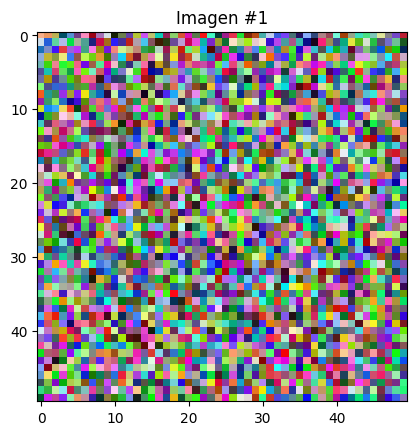

Resultado 1: Imagen #1

--- SEGUNDA LLAMADA A 'produce' ---
   (Función 'produce' va a pedir el siguiente item...)

   (Generador trabajando para producir item #2...)
   ('produce' recibió el item. La operación tomó 0.50 segundos)


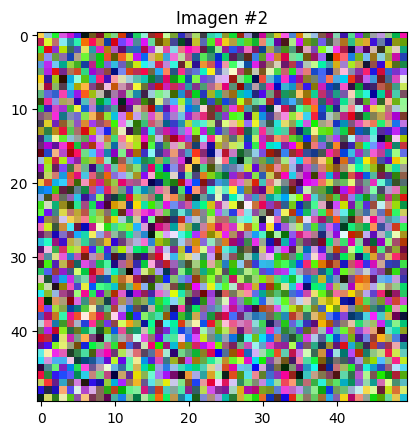

Resultado 2: Imagen #2


In [62]:
# --- Conectando el Generador con el Consumidor 🔗 ---
if __name__ == "__main__":
    # 1. Creamos el generador. ¡Ojo! El código dentro de la función aún no se ejecuta.
    # Solo se crea el objeto generador, listo para empezar.
    my_iterator = create_row_iterator(total_items=3)

    # 2. Llamamos a 'produce' por primera vez.
    # 'produce' llama a next(), lo que hace que el generador corra HASTA el primer 'yield'.
    print("\n--- PRIMERA LLAMADA A 'produce' ---")
    produced_row_1 = produce(my_iterator)
    print(f"Resultado 1: {produced_row_1.name}")

    # 3. Llamamos a 'produce' por segunda vez.
    # 'produce' llama a next() de nuevo. El generador se reanuda desde donde se quedó
    # y corre HASTA el segundo 'yield'.
    print("\n--- SEGUNDA LLAMADA A 'produce' ---")
    produced_row_2 = produce(my_iterator)
    print(f"Resultado 2: {produced_row_2.name}")